# EDA of the TMDB dataset

## 1. Basic Data Exploration

In [1]:
# import packages and load TMDB dataset

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import json
import ast

df = pd.read_csv("C://Users//prash//Documents//Digital Futures//Programmatic Data Wrangling//Solo Project//TMDB_movies.csv")

In [2]:
## Visualing the head of the dataset
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Note:
Columns: 'genres', 'keywords', 'production_companies', 'production_countries', and 'spoken_languages' are single arrays containing JSON. This will either have to be flattened and separated into several separate columns or will have to be processed as a JSON using the relevant libraries.
Unsure as to what the popularity columns is but most likely a percentage.

In [3]:
## Checking the dimensions of the dataset
df.shape

(4803, 20)

### Note:

The dataset consists of 4903 observations, with 20 columns.

In [4]:
## Checking the Dtypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Note:

Release date is an object rather than a datetime Dtype. This could be changed later on.

In [5]:
## Checking for anomalies or unusual columns in the data
df.describe(include = 'all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


### Note:

Several columns have a min value of 0 ('budget', 'popularity','revenue', 'runtime'). These are likely to be placeholder values. The columns 'vote_average' and 'vote_count' have min values of 0 but, this could be correct, Further exploration needed.


## 1.1 Finding Nulls

<Axes: >

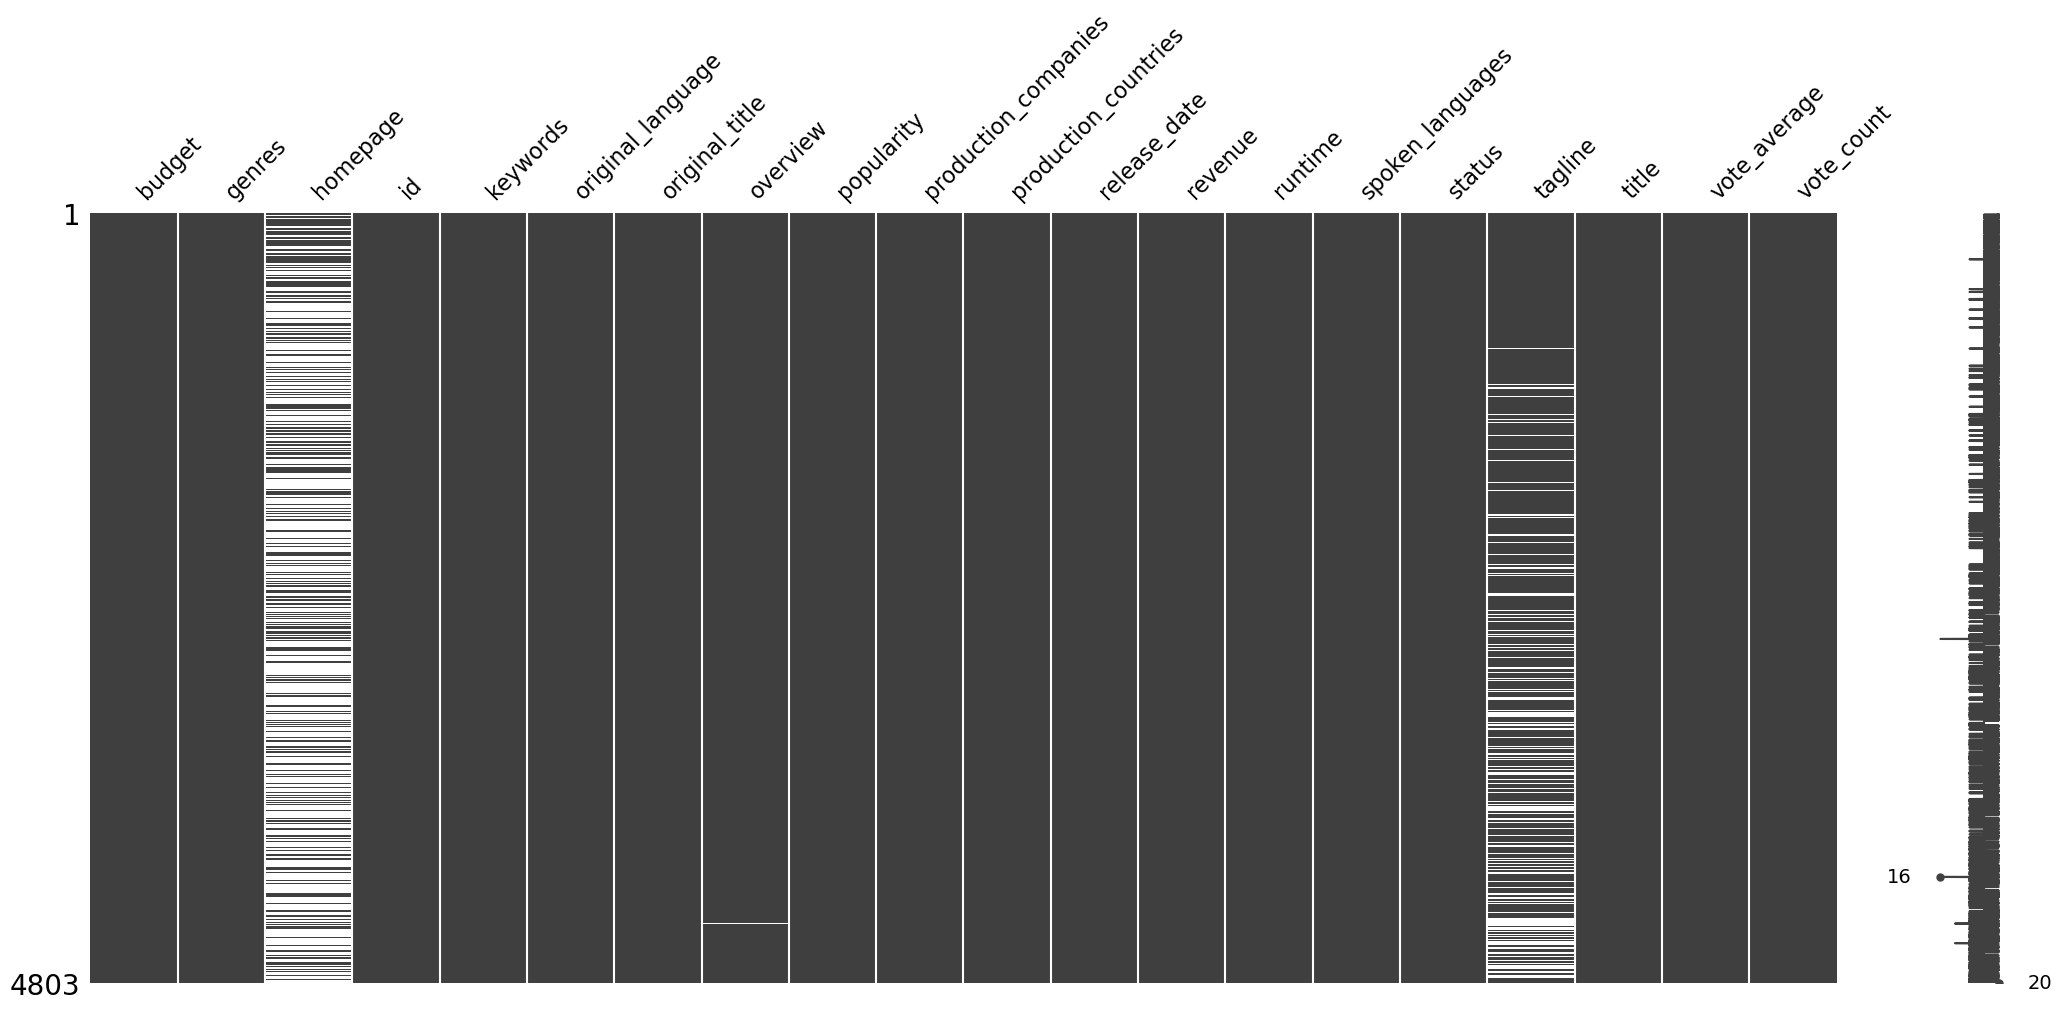

In [6]:
msno.matrix(df)

## Note:

homepage and tagline have many null values.

In [7]:
# counting nulls

null_df = df.isnull()
sum_of_nulls = null_df.sum()
sum_of_nulls

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [8]:
## Finding percentage of values that are null for each column. Code adapted from DF workbook.

null_vals_df = pd.DataFrame(sum_of_nulls, columns = ['null'])
null_vals_df['percent'] = round((null_vals_df['null']/4803)*100,2)
null_vals_df

,null,percent
budget,0,0.00
genres,0,0.00
homepage,3091,64.36
id,0,0.00
keywords,0,0.00
original_language,0,0.00
original_title,0,0.00
overview,3,0.06
popularity,0,0.00
production_companies,0,0.00


### Note:
- homepage is 64.36% null.
- tagline is 17.57% null.
- overview is 0.06% null. 
- release_date is 0.02% null.
- runtime is 0.04% null.

Observations with null values for 'overview', 'release_date', and 'runtime' can likely be dropped with little affect on general trends. 'homepage' and 'tagline' nulls will have to filled with a value such as 'Not-Available' as they make up a large percentage of values, aren't numeric and therfore can't be custom filled easily.

In [9]:
## Dropping overview, release_date and runtime.
df = df.dropna(subset=['overview','release_date','runtime'], axis = 0)

In [10]:
## Filling null values with 'N/A'
df['homepage'] = df['homepage'].fillna('N/A')

In [11]:
## Filling null values with 'N/A'
df['tagline'] = df['tagline'].fillna('N/A')

In [12]:
null_df = df.isnull()
sum_of_nulls = null_df.sum()
sum_of_nulls

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

## Exploring Numeric Data Values

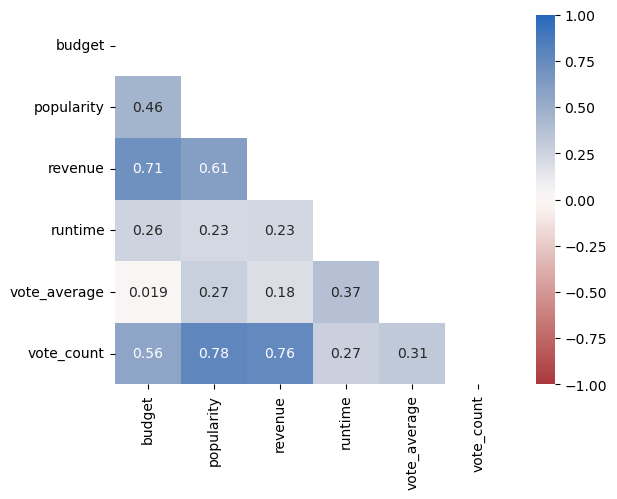

In [68]:
numeric_column_corr = df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].corr()
sns.heatmap(numeric_column_corr,
            annot = True,
            cmap="vlag_r",
            vmax = 1,
            vmin = -1,
            mask=np.triu(np.ones(numeric_column_corr.shape)))
plt.show()

## Note:

- Vote_count positively correlated with both revenue and budget.
- Revenue and budget positively correlated.

In [14]:
max_budget_row = df.loc[df['budget'].idxmax()]

In [15]:
max_budget_row

budget                                                          380000000
genres                  [{"id": 12, "name": "Adventure"}, {"id": 28, "...
homepage                http://disney.go.com/pirates/index-on-stranger...
id                                                                   1865
keywords                [{"id": 658, "name": "sea"}, {"id": 1316, "nam...
original_language                                                      en
original_title                Pirates of the Caribbean: On Stranger Tides
overview                Captain Jack Sparrow crosses paths with a woma...
popularity                                                     135.413856
production_companies    [{"name": "Walt Disney Pictures", "id": 2}, {"...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2011-05-14
revenue                                                        1045713802
runtime                               

In [16]:
min_budget_row = df.loc[df['budget'].idxmin()]

In [17]:
min_budget_row

budget                                                                  0
genres                  [{"id": 35, "name": "Comedy"}, {"id": 14, "nam...
homepage                                                              N/A
id                                                                  10588
keywords                [{"id": 977, "name": "cat"}, {"id": 1155, "nam...
original_language                                                      en
original_title                                         The Cat in the Hat
overview                Conrad and Sally Walden are home alone with th...
popularity                                                      18.251129
production_companies    [{"name": "Imagine Entertainment", "id": 23}, ...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2003-11-21
revenue                                                                 0
runtime                               

## Note:

It is unlikely that a movie had a budget of 0. This is likely to be a placeholder value.

In [18]:
max_revenue_row = df.loc[df['revenue'].idxmax()]

In [19]:
max_revenue_row

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [20]:
min_revenue_row = df.loc[df['revenue'].idxmin()]

In [21]:
min_revenue_row

budget                                                           27000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                                              N/A
id                                                                  79698
keywords                                                               []
original_language                                                      en
original_title                                                 The Lovers
overview                The Lovers is an epic romance time travel adve...
popularity                                                       2.418535
production_companies    [{"name": "Corsan", "id": 7299}, {"name": "Bli...
production_countries    [{"iso_3166_1": "AU", "name": "Australia"}, {"...
release_date                                                   2015-02-13
revenue                                                                 0
runtime                               

## Note:

It is unlikely that a movie had a revenue of 0. This is likely to be a placeholder value.

Replacing placeholder values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   homepage              4799 non-null   object 
 3   id                    4799 non-null   int64  
 4   keywords              4799 non-null   object 
 5   original_language     4799 non-null   object 
 6   original_title        4799 non-null   object 
 7   overview              4799 non-null   object 
 8   popularity            4799 non-null   float64
 9   production_companies  4799 non-null   object 
 10  production_countries  4799 non-null   object 
 11  release_date          4799 non-null   object 
 12  revenue               4799 non-null   int64  
 13  runtime               4799 non-null   float64
 14  spoken_languages      4799 non-null   object 
 15  status                4799

In [23]:
df['budget'] = df.budget.replace(0, pd.NA)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

In [24]:
df['revenue'] = df.revenue.replace(0, pd.NA)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

In [25]:
df.budget.min()

1.0

In [26]:
df.revenue.min()

5.0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3763 non-null   float64
 1   genres                4799 non-null   object 
 2   homepage              4799 non-null   object 
 3   id                    4799 non-null   int64  
 4   keywords              4799 non-null   object 
 5   original_language     4799 non-null   object 
 6   original_title        4799 non-null   object 
 7   overview              4799 non-null   object 
 8   popularity            4799 non-null   float64
 9   production_companies  4799 non-null   object 
 10  production_countries  4799 non-null   object 
 11  release_date          4799 non-null   object 
 12  revenue               3376 non-null   float64
 13  runtime               4799 non-null   float64
 14  spoken_languages      4799 non-null   object 
 15  status                4799

These values are still too small for a budget or a revenue. Perhaps they're in millions?

<Axes: ylabel='Frequency'>

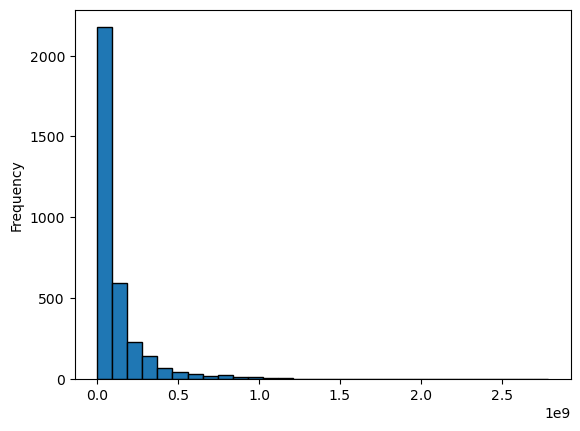

In [28]:
## Plotting a histogram of the distribution of revenue.
df.revenue.plot(kind = 'hist', bins = 30, edgecolor='black')

## Note:

Positive skew. Most values are in the first bin so are below roughly 100,000,000.

<Axes: ylabel='Frequency'>

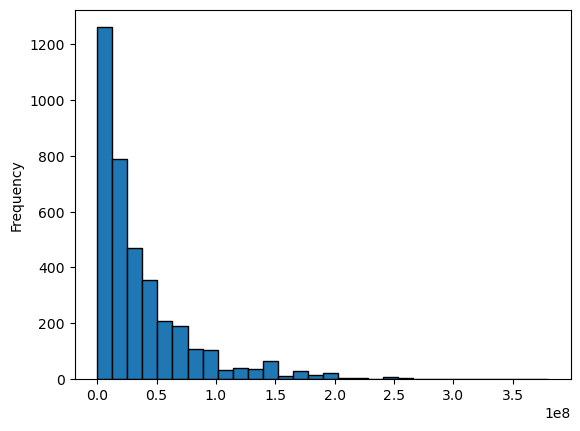

In [29]:
## Plotting a histogram of the distribution of budget.
df.budget.plot(kind = 'hist', bins = 30, edgecolor='black')

## Note:

Positive skew. Most values are in the first two bins so are below roughly 12,500,000.

In [30]:
## Finding the mean budget.
df.budget.mean()

37068140.717246875

In [31]:
## Finding the mean revenue.
df.revenue.mean()

117031352.91587678

In [32]:
## Finding the mean profit.
mean_profit = round(df.revenue.mean() - df.budget.mean(),2)

In [33]:
mean_profit

79963212.2

## To do:

- Look further into the lower values of budget and revenue. Why are some figures so low?
- Explore other measures of central tendency. Add a column showing profit using the best measure. Also custom fill new null values for revenue and budget with a suitable measure of central tendency.

## Exploring Object Data Values

In [34]:
## finding duplicates

df.duplicated().sum()

0

In [35]:
## Checking no. of unique values in columns.
df.nunique()

budget                   433
genres                  1175
homepage                1692
id                      4799
keywords                4220
original_language         37
original_title          4797
overview                4799
popularity              4798
production_companies    3695
production_countries     469
release_date            3278
revenue                 3296
runtime                  156
spoken_languages         544
status                     3
tagline                 3945
title                   4796
vote_average              71
vote_count              1609
dtype: int64

In [36]:
df['original_language'].count()

4799

In [37]:
## unique original language values
df.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [38]:
## Making original lanugage column categorical
df['original_language'] = df.original_language.astype('category')

### Note:

'original_language' was made to be categorical.

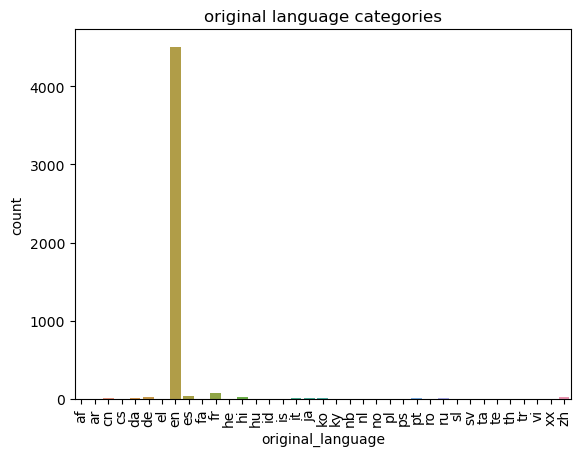

In [66]:
## Bar chart showing the language category counts
sns.countplot(data = df, x = 'original_language')
observed = False
plt.xticks(rotation=90)
plt.title('original language categories')
plt.show()

In [40]:
orig_lan_value_counts = df['original_language'].value_counts()
orig_lan_value_counts

original_language
en    4503
fr      70
es      32
zh      27
de      26
hi      19
ja      16
it      13
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ar       2
ta       2
id       2
ro       2
cs       2
sl       1
te       1
tr       1
vi       1
xx       1
ps       1
pl       1
no       1
nb       1
ky       1
el       1
is       1
hu       1
af       1
Name: count, dtype: int64

## Note:

Dataset contains films mostly with an original_language value of 'en'.

## To do:

Find percentage of orig_lang en vs rest.

### Note:

'status' was made to be categorical.

In [41]:
## unique status values
df['status'].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [42]:
## Making status columns Dtype of category
df['status'] = df.status.astype('category')

In [43]:
df['status'].unique()

['Released', 'Post Production', 'Rumored']
Categories (3, object): ['Post Production', 'Released', 'Rumored']

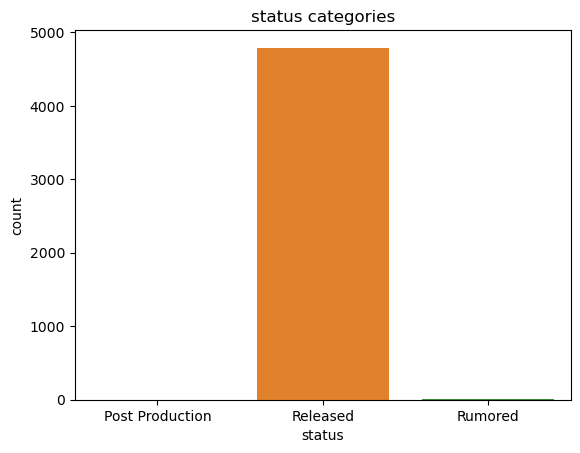

In [67]:
## Plotting bar chart of the status categories and their counts.
observed = False
sns.countplot(data = df, x = 'status')
plt.title('status categories')
plt.show()

In [45]:
status_value_counts = df['status'].value_counts()
status_value_counts

status
Released           4791
Rumored               5
Post Production       3
Name: count, dtype: int64

### Note:

- All but 8 observations are of status 'Released'
- Rumored and Post production observations should be removed if the dataset is for released movies. More investigation needed.

In [46]:
rumored_status_obs = df[df['status'] == 'Rumored']

In [47]:
rumored_status_obs

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4401,NaN,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",N/A,43630,[],en,The Helix... Loaded,,0.020600,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-01-01,NaN,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,N/A,The Helix... Loaded,4.8,2
4453,NaN,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",N/A,57294,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 97...",en,Crying with Laughter,Powerfully redemptive and darkly comedic reven...,0.108135,"[{""name"": ""Scottish Screen"", ""id"": 698}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-06-01,NaN,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,A Bad Trip Down Memory Lane,Crying with Laughter,7.0,1
4508,56000.0,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.facebook.com/theharvestfilm,70875,"[{""id"": 1729, ""name"": ""migration""}, {""id"": 190...",en,The Harvest (La Cosecha),The story of the children who work 12-14 hour ...,0.010909,[],[],2011-07-29,NaN,80.0,[],Rumored,N/A,The Harvest (La Cosecha),0.0,0
4662,NaN,"[{""id"": 35, ""name"": ""Comedy""}]",N/A,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,N/A,Little Big Top,10.0,1
4754,NaN,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",N/A,84659,[],en,The Naked Ape,The Naked Ape is a coming-of-age film followin...,0.077577,[],[],2006-09-16,NaN,110.0,[],Rumored,N/A,The Naked Ape,5.0,1


## Note:

- Observation 4508 has a budget of 56,000. If the film is only rumored, how can this be the case?
- tagline, keywords, production_companies, production_countries, and spoken_languages are absent from this row.


- Similarly, why are there votes for these films?


In [48]:
pp_status_obs = df[df['status'] == 'Post Production']

In [49]:
pp_status_obs 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2906,NaN,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",https://www.facebook.com/eastsidestorymovie,357837,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 271, ""...",cs,Dancin' It's On,"This coming of age Dance Film, in the spirit o...",0.186234,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-16,NaN,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,Dancin' Like You've Never Seen Before,Dancin' It's On,4.3,2
4169,1900000.0,"[{""id"": 18, ""name"": ""Drama""}]",N/A,295886,[],en,Brotherly Love,West Philadelphia basketball star Sergio Taylo...,1.367751,[],[],2015-04-24,NaN,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,N/A,Brotherly Love,6.9,21
4178,2000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",http://www.sonyclassics.com/higherground/,50875,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1157, ""n...",en,Higher Ground,A chronicle of one woman's lifelong struggle w...,1.699101,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-08-26,841733.0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,N/A,Higher Ground,5.3,14


## Note:

- All films seem to have votes which shouldn't be the case for a film in post production.
- Observation 4169 and 4178 have a budget despite being in post production but this could be an expected budget.

- 4178 has a revenue, which cannot be the case for a post prod movie. Tagline and production companies values are absent for this observation.



## To do:

Consider setting the table index to ID as it is a unique identifier.

## Removing JSON from columns

In [50]:
## Modified from discord

def extract_dict_list(dictionary):
    ''' Take a list of movies' genres and make them into a list of comma-separated strings '''
    result = []
    for data in dictionary:
        data_list = ast.literal_eval(data)  ## make sure it's a list!
        values = [x['name'] for x in data_list]  ## Get a list of all names
        result.append(", ".join(values))  ## Join them all together as a string and add to the result list
    return result

In [51]:
df['clean_genres'] = extract_dict_list(df.genres)

In [52]:
df = df.drop('genres', axis = 1)

In [53]:
df['clean_keywords'] = extract_dict_list(df.keywords)

In [54]:
df = df.drop('keywords', axis = 1)

In [55]:
df['clean_production_companies'] = extract_dict_list(df.production_companies)

In [56]:
df = df.drop('production_companies', axis = 1)

In [57]:
df['clean_production_countries'] = extract_dict_list(df.production_countries)

In [58]:
df = df.drop('production_countries', axis = 1)

In [59]:
df['clean_spoken_languages'] = extract_dict_list(df.spoken_languages)

In [60]:
df = df.drop('spoken_languages', axis = 1)

In [61]:
df.shape

(4799, 20)

In [62]:
df

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,clean_genres,clean_keywords,clean_production_companies,clean_production_countries,clean_spoken_languages
0,237000000.0,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2.787965e+09,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom","English, Español"
1,300000000.0,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,9.610000e+08,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,English
2,245000000.0,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,8.806746e+08,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","United Kingdom, United States of America","Français, English, Español, Italiano, Deutsch"
3,250000000.0,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1.084939e+09,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...","Legendary Pictures, Warner Bros., DC Entertain...",United States of America,English
4,260000000.0,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,2.841391e+08,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures,United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000.0,N/A,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2.040920e+06,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"Action, Crime, Thriller","united states–mexico barrier, legs, arms, pape...",Columbia Pictures,"Mexico, United States of America",Español
4799,9000.0,N/A,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,NaN,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"Comedy, Romance",,,,
4800,NaN,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,NaN,120.0,Released,N/A,"Signed, Sealed, Delivered",7.0,6,"Comedy, Drama, Romance, TV Movie","date, love at first sight, narration, investig...","Front Street Pictures, Muse Entertainment Ente...",United States of America,English
4801,NaN,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,NaN,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,,,,"United States of America, China",English


In [63]:
## Investigating films with the keystring 'based on novel'.
based_on_novel = df[df['clean_keywords'].str.contains('based on novel', case=False, na=False)]

In [64]:
based_on_novel

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,clean_genres,clean_keywords,clean_production_companies,clean_production_countries,clean_spoken_languages
2,245000000.0,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,8.806746e+08,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","United Kingdom, United States of America","Français, English, Español, Italiano, Deutsch"
4,260000000.0,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,2.841391e+08,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures,United States of America,English
15,225000000.0,N/A,2454,en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,2008-05-15,4.196514e+08,150.0,Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,"Adventure, Family, Fantasy","based on novel, fictional place, brother siste...","Walt Disney, Walden Media, Stillking Films, Oz...","Czech Republic, Poland, Slovenia, United State...",English
32,200000000.0,http://disney.go.com/wonderland/,12155,en,Alice in Wonderland,"Alice, an unpretentious and individual 19-year...",78.530105,2010-03-03,1.025491e+09,108.0,Released,You're invited to a very important date.,Alice in Wonderland,6.4,4645,"Family, Fantasy, Adventure","based on novel, fictional place, queen, fantas...","Walt Disney Pictures, Team Todd, Tim Burton Pr...",United States of America,English
49,105000000.0,N/A,64682,en,The Great Gatsby,An adaptation of F. Scott Fitzgerald's Long Is...,61.196071,2013-05-10,3.510404e+08,143.0,Released,Reserving judgments is a matter of infinite ho...,The Great Gatsby,7.3,3769,"Drama, Romance","based on novel, infidelity, obsession, hope, 3d","Village Roadshow Pictures, Bazmark Films, Warn...","United States of America, Australia",English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,2777000.0,http://thewizardofoz.warnerbros.com/,630,en,The Wizard of Oz,Young Dorothy finds herself in a magical world...,67.417542,1939-08-15,3.375497e+07,102.0,Released,"We're off to see the Wizard, the wonderful Wiz...",The Wizard of Oz,7.4,1642,"Adventure, Family, Fantasy","witch, adolescence, based on novel, secret ide...",Loew's Incorporated,United States of America,English
4076,2000000.0,N/A,595,en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",22.139842,1962-12-25,1.312985e+07,129.0,Released,N/A,To Kill a Mockingbird,8.0,657,"Crime, Drama","black people, based on novel, brother sister r...",Universal Pictures,United States of America,English
4083,2000000.0,N/A,990,en,The Hustler,Fast Eddie Felson is a small-time pool hustler...,17.639478,1961-09-25,7.600000e+06,134.0,Released,They called him Fast Eddie. He was a winner. H...,The Hustler,7.6,240,Drama,"suicide, gambling, manager, alcohol, based on ...","Twentieth Century Fox Film Corporation, Rossen...",United States of America,English
4281,1288000.0,N/A,223,en,Rebecca,A self-conscious bride is tormented by the mem...,18.426825,1940-04-12,6.000000e+06,130.0,Released,The shadow of this woman darkened their love.,Rebecca,7.7,336,"Drama, Mystery","monte carlo, based on novel, age difference, s...",Selznick International Pictures,United States of America,"English, Français"
